## Table of Contents
- [B5: Model Based Process Control](#B5%3A-Model-Based-Process-Control)
  - [5.1 Concepts](#5.1-Concepts)
  - [5.2 User Stories](#5.2-User-Stories)
- [🏠 Home](../../welcomePage.ipynb)

# B5: Model Based Process Control

Model-based process control is a mathematical and visual technique to addressing the challenges associated with designing complex control. This technique involves two key aspects. (a) The control analysis, representing the modeling and simulation aspects of the system including tuning and configuration, and automatic code generation. Each block of the model contains mathematical equations that emulate the behavior of the physical system. (b) The system and software, representing continuous validation and verification through testing, and deployment of the system. In this regard, when model-based control is used efficiently, it offers a single design platform to enhance overall system design. Through virtual prototyping, system engineers can easily see whether the whole system is working as intended, even before the hardware is manufactured and available for testing.


## 5.1 Concepts
<center>
    <img src="../../img/03.jpg" alt="Alt text" width="400">
</center>


## 5.2 User Stories
- [Model Predictive Control](../../Modules/Examples/2.%20Learning%20Modules/2.6.%20Model%20Predictive%20Control/Model%20Predictive%20Control.ipynb) - This module demonstrates calculating a single time step's move trajectory using the same system as the Dahlin controller.

## 5.3 Example: Machine Tool Power Drive System with Flexibility
Heavy machine tools are used to mill a workpiece in computer numerically contolled (CNC) milling processes.
Although they are intended to be rigid structures for accurate positioning of the cutter relative to the workpiece, some operating conditions such as high feedrate and long unsupported lengths, are prone to positioning error from torsion and vibration.
Torsion causes a positioning error since the workpiece is not at the desired location specified by the motor shaft and gearbox, due to a difference in angular displacement along the lead screw from the gearbox to the moving table.
Positioning error causes the cutter to cut in an undesirable location, giving an uncertain final profile of the cut.
Vibrations during the cutting process are unwanted as they leave defects in the cut surface called "chatter".

Let's examine torsion (twist) in a long lead screw and gearbox and implement model based process control in order to alleviate the variability in positioning due to torsion.
The image below shows one axis of the machine tool in which a workpiece is machined by a cutter. The workpiece is fastened to the table.
THe table slides on two guide rods. The table is driven by a lead screw.
Note that we pronounce this "leed" as in leadership, not lead (Pb) the toxic metal element.
One revolution of the lead screw moves the table by a length called the lead $l$ of the screw.
This length depends on the helix angle of the screw and the radius of the screw.
As a slender metal rod with a length around 1 meter or more, a lead screw is not perfectly stiff.
The lead screw experiences torsional strain, elongating slightly in response to the reaction force of moving the table and pushing the workpiece against the cutter.
In the diagram below, a gearbox and motor are also shown.
The gearbox reduces the angular speed from the motor shaft speed to the lead screw angular speed, thereby increasing the torque from the motor shaft to the lead screw by the same factor.
The compliance (the inverse of stiffness) of the system is due to the lead screw and the gearbox.

<center>
    <img src="../../img/Module5_MachineToolDriveSystem.jpg" alt="Alt text" width="400">
</center>

Our goal is to design a controller, potentially using a potentiometer sensor at the lead screw-to-table interface, to drive the angular displacement at the lead-screw-to-table interface to be the desired displacement for this signal.
In the diagram below, we seek to control $\theta_l(t)$ (lead screw angular displacement) from our motor actuator which generates an electrical current, and thus a motor torque $\tau_m(t)$. 
Our convention for subscripts will be $l$ for lead screw, $m$ for motor, and $1$ for the gear box.
Note the small difference between $l$ and $1$.

The diagram show a lumped parameter model of the system.
The motor is a signal-controlled source of torque, $\tau_m(t)$.
The first inertia is $J_m$, which represents the shaft of the motor.
The inertias of the two gears are neglected.
The torque $T_1$ is a reaction torque that the motor shaft "feels" according to Newton's 3rd law of motion when the shaft pushes the gearbox with positive angular speed $\omega_m$ of the motor shaft.
Another term on this shaft, to the left of the motor, is the viscous damping $c_m\omega_m$. This is a torque that always opposes the motion of the motor shaft. This represents bearing friction and potentially windage (air resistance) inside the motor.
The units of a damping constant $c$ are such that $T = c \omega$, so they are torque per angular speed units, newton-meter-seconds-per-radian.

Now we examine the second shaft, which is the lead screw.
We see a reaction torque $T_1 N$, wiht gearbox speed reduction ratio $N$.
Commonly, $1<N<30$ for a single stage of spur gears in speed reduction applications, although other transmission devices such as harmonic drives can achieve a higher speed reduction ratio.
The speed of the lead screw at the gear box is indicated as $\frac{\omega_m}{N}$.
Notice that this is simply the motor shaft speed divided by the gearbox's speed reduction ratio $N$.
Also notice that the gearbox causes a change in rotational direction for meshed gears. 
The motor shaft turns counterclockwise when viewed from the left, but the lead screw turns clockwise when viewed from the left.
We see along the lead screw diagram the jagged line indicating a mechaincal spring.
This is the lumped parameter model element of a torsional spring.
The torsional spring has equation:
$$T = k\left(\Delta \theta\right)$$
meaning the torque acting at both ends of the spring (which must be equal and opposite in direction) is equal to a torsional spring constant $k$ times the relative angular displacement (the difference in angular discplacement) between the two ends of the spring.
We will see the difference in angular displacement of the two ends once we see the difference in angular speed.
The right end of the torsional spring indicates the point on the lead screw where the table contacts the screw.
Technically, this is a machined block called the "nut" since it has threads cut in it like a hardware nut fastener.
The angular speed here is labeled $\omega_l$ to indicate the angular speed of the lead screw.
In this way, the torsional spring can model both compliance of the gear as well as compliance from the gearbox to the nut along the lead screw.
So we have angular speeds of: $\frac{\omega_m}{N}$ and $\omega_l$.
We can take the integrals of these speeds with some starting reference point to get angular discplacements: $\frac{\theta_m}{N}$ and $\theta_l$.
Now we see the torsional spring's torque transmitted through the spring, which is also shown as an expression with torque arrow in the diagram:
$$T = k\left(\Delta \theta\right) = k\left(\frac{\theta_m}{N} - \theta_l\right) $$
There is are two more elements in our model: another inertia and another viscous friction element.
The last inertia, $J_l$ indicates the inertia of the lead screw, table, and workpiece. Although the table and workpiece experience linear motion, it is possible to convert this to the equivalent for rotatoinal motion and model it wiht the lead screw's own inertia.
The viscous friction element has resistive torque equal to $c_l \omega_l$, always opposing the direction of $\omega_l$.
The viscous friction represents bearing friction of the table on its linear rail guides as well as friction at the nut to lead-screw interface.

How do we model the cutting force?

* One option is to increase the $c_l$ parameter, assuming that cutting force is linearly increasing with feedrate.
* Another option is to add a term to the model specifying cutting force at the workpiece, which can be modeled as a load torque acting on the lead screw.
* For now we will consider the case of zero cutting force.

<center>
    <img src="../../img/Module5_DriveSystemModel.jpg" alt="Alt text" width="400">
</center>

We can write three  equations using Newton's 2nd law of motion.
We are summing the torques on a shaft and equating this to the shaft's total moment of inertia multiplied by its angular acceleration $\dot\omega$.
Notice that the shaft segment from the second gear of the gearbox to the torsional spring has zero moment of inertia assigned to it, so we use $J=0$ in our second equation below.

$$ \tau_m - c_m \omega_m - T_1 = J_m \dot\omega_m$$
$$ T_1/N - k\left(\frac{\theta_m}{N} - \theta_l\right) = 0 $$
$$ k\left(\frac{\theta_m}{N} - \theta_l\right) -c_l \omega_l = J_l \dot\omega_l$$

The preceding system of three equations had four unknowns $\tau_m$, $T_1$, $\theta_m$, and $\theta_l$.
We eliminate $T_1$ and $\theta_m$ to arrive at a transfer function:
$$\frac{\Theta_l}{\tau_m}(s) = 
\frac{
\frac{k}{N} }
{ \left(J_l s^2 + c_l s + k \right)\left(J_m s^2 + c_m s + \frac{k}{N^2} \right) - \frac{k^2}{N^2} }
$$

Your task will be to code this transfer function in SimPy in order to perform further analysis.

## Basics of using SimPy for symbolic math operations
We need to import the SymPy module to get symbolic math capabilities.

In [1]:
import sympy

We need to start the pretty-printer to get nicely typeset math.

In [2]:
sympy.init_printing()

In order to do symbolic calculations, we need to create a symbol.

In [3]:
x = sympy.Symbol('x')

Running the next line will print out the variable, and we can see that this is a SymPy symbol

In [4]:
x

SymPy allows us to do many mathematical operations that would be tedious by hand. For instance, we can expand a polynomial:

In [5]:
polynomial = (3*x + 4)**4
polynomial.expand()

Notice what happened - we defined a new name called “polynomial” and then used the .expand() method to expand the polynomial. We can see all the methods associated with an object by typing its name and a dot then pressing “tab”.

Call up the list of methods for the polynomial variable by entering “.” and pressing tab at the end of the line in the cell below:

In [6]:
polynomial

To get help about any method, we can type its name and append a ? at the end, then evaluate the cell

Obtain help about the .expand() method by evaluating the cell below:

In [7]:
polynomial.expand?

Signature:
polynomial.expand(
    deep=True,
    modulus=None,
    power_base=True,
    power_exp=True,
    mul=True,
    log=True,
    multinomial=True,
    basic=True,
    **hints,
)
Docstring:
Expand an expression using hints.

See the docstring of the expand() function in sympy.core.function for
more information.
File:      /opt/conda/lib/python3.11/site-packages/sympy/core/expr.py
Type:      method

It is also possible to obtain help for a function by placing the cursor between the parentheses and pressing Shift+Tab.
Try this in the cell below for the ".coeff()" method of polynomial.

In [8]:
polynomial.coeff

<bound method Expr.coeff of (3*x + 4)**4>

Here's an example of factoring a polynomial. Notice that we are still using the variable "x" which we defined above.

In [9]:
(x**2 + 4*x + 4).factor()

You will notice that SymPy’s default behaviour is to retain exact representations of certain numbers:

In [10]:
number = sympy.sqrt(2)*sympy.pi
number

To convert the exact representations above to an approximate floating point representations, use one of these methods. 
* sympy.N works with complicated expressions containing variables as well.
* float will return a normal Python float and is useful when interacting with non-SymPy programs.

In [11]:
sympy.N(number*x)

In [12]:
float(number)

## Solving Equations
Sympy can help us solve manipulate equations using the `solve` function. Like many solving functions, it finds zeros of a function, so we have to rewrite equalities to be equal to zero.
Consdier this equation:
$$
\begin{align}
2x^2 + 2 &= 4 \\
2x^2 + 2 - 4 &= 0 \\
2x^2 - 2 &= 0 \\
x^2 - 1 &= 0
\end{align}
$$
Let's plot so we know the zeros of the function graphically:

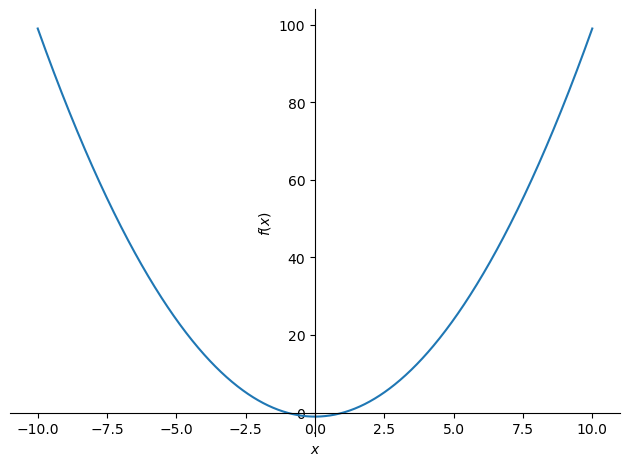

In [13]:
sympy.plot(x**2 - 1)

Try accessing the help for `sympy.plot()` to find the ability to set horizontal and vertical axis limits and the overall size of the plot. Then use this information in the next code block to suit your needs for viewing the plot.

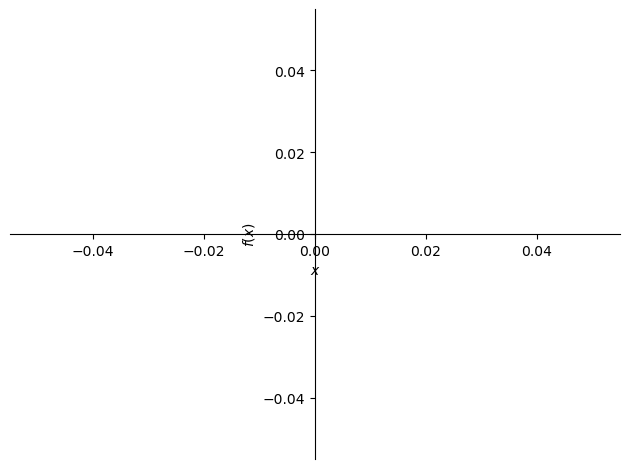

In [14]:
sympy.plot()

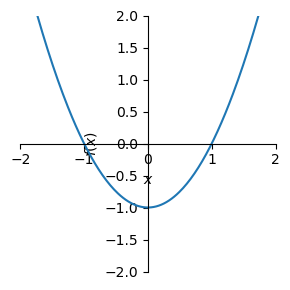

In [15]:
sympy.plot(x**2 - 1,xlim = [-2, 2],ylim = [-2,2],size = [3,3])

Now let's examine the solutions that Sympy gives us:

In [16]:
solutions = sympy.solve(2*x**2 + 2 - 4)
solutions

You can access a single element in the tuple, and element numbering starts at 0 in Python.
Run the two code blocks below to access the first and second elements of the solution (the values of $x$ that satisfy $2x^2 + 2 = 4$.

In [17]:
solutions[0]

In [18]:
solutions[1]

We can also use `sympy.Eq` to construct equations

In [19]:
equation = sympy.Eq(2*x**2 + 2, 4)
equation

The `roots` function will give us the roots (the values of $x$ which solve the equation) as well as the multiplicity of the roots as well.
A root such as -3 in $x^2+6x+9=0$ has multiplicity 2 as the equation is equivalent to $(x+3)^2=0$

In [20]:
sympy.roots(equation)

This result may look confusing at first. It is a python dictionary. Let's access the values in the dictionary by using square brackets with the dictionary key (in this case -1 or 1) as the argument in the square brackets as in the code block below.

In [21]:
answer = sympy.roots(equation)
print(f"The first root, at -1, has multiplicity {answer[-1]}")
print(f"The second root, at 1, has multiplicity {answer[1]}")

The first root, at -1, has multiplicity 1
The second root, at 1, has multiplicity 1


We can also solve systems of equations by passing a list of equations to solve and asking for a list of variables to solve for.

In [22]:
x, y = sympy.symbols('x, y')
sympy.solve([x + y - 2,
             x - y - 0], [x, y])

This even works with symbolic variables in the equations, such as solving this system for $x$ and $y$ with symbolic variables (system parameters) $a$, $b$, and $c$.
\begin{align}
ax+by &= 2 \\
ax-by &= c
\end{align}

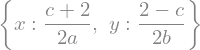

In [23]:
a, b, c = sympy.var('a, b, c')
solution = sympy.solve([a*x + b*y - 2,
                        a*x - b*y - c], [x, y])
solution

## Back to the Machine Tool Power Drvie System Modeling and Control Problem
Let's set the system parameters as variables

In [24]:
import math
#set model parameters
J_m = 1e-4 #motor shaft inertia in newton-meter-second-squared-per-radian
J_l = 1e-3 #lead screw shaft inertia in newton-meter-second-squared-per-radian
c_m = 1e-2 #damping constant of motor shaft bearings in newton-meter-second-per-radian
c_l = 1e-2 #damping constant of lead screw shaft bearings in newton-meter-second-per-radian
k = 1 #torsional spring constant of lead screw in newton-meter-seconds-squared-per-radian
N = 5 #gear speed reduction ratio of gearbox
print(f'J_m = {J_m:0.3g} newton-meter-second-squared-per-radian') #notice that the format specifier with 0.3g gives 3 significant digits. Notice the f before the string as well.
print(f'J_l = {J_l:0.3g} newton-meter-second-squared-per-radian')
print(f'c_m = {c_m:0.3g} newton-meter-second-per-radian')
print(f'c_l = {c_l:0.3g} newton-meter-second-per-radian')
print(f'k = {k:0.3g} newton-meter-seconds-squared-per-radian')
print(f'N = {N:0.3g}, unitless')

print('model parameters are loaded')

J_m = 0.0001 newton-meter-second-squared-per-radian
J_l = 0.001 newton-meter-second-squared-per-radian
c_m = 0.01 newton-meter-second-per-radian
c_l = 0.01 newton-meter-second-per-radian
k = 1 newton-meter-seconds-squared-per-radian
N = 5, unitless
model parameters are loaded


Let's create this equation in SimPy:
$$\frac{\Theta_l}{\tau_m}(s) = 
\frac{
\frac{k}{N} }
{ \left(J_l s^2 + c_l s + k \right)\left(J_m s^2 + c_m s + \frac{k}{N^2} \right) - \frac{k^2}{N^2} }
$$

Your task will be to code this transfer function in SimPy in order to perform further analysis.
Here's an example of composing a transfer function:

In [25]:
from sympy import Symbol
from sympy.physics.control.lti import TransferFunction

s = Symbol('s')
numerator = s + 1
denominator = s**2 + 2*s + 1

transfer_function = TransferFunction(numerator, denominator, s)

print(transfer_function)

TransferFunction(s + 1, s**2 + 2*s + 1, s)


Now you create the numerator and denominator using the symbols $s$ and the system parameters loaded above.

In [26]:
s = Symbol('s')
numerator = k/N
denominator = (J_l*s**2 + c_l*s + k)*(J_m*s**2 + c_m*s + k/N**2)-k**2/N**2

transfer_function = TransferFunction(numerator, denominator, s)

print(transfer_function)

TransferFunction(0.2, (0.0001*s**2 + 0.01*s + 0.04)*(0.001*s**2 + 0.01*s + 1) - 0.04, s)


The denominator of a system transfer function is called a characteristic equation. Find the roots of the characteristic equation. Note that we can access the denominator of a SymPy TransferFunction object at its `.den` property

In [27]:
sympy.roots(transfer_function.den)

One observation is that all the roots are negative or zero. This is important for stability of a closed loop control system.

This will involve extracting the numerator and denominator of the transfer function and then converting them to lists of coefficients with the floating point numbers being Python floats, not Sympy floats.

In [28]:
import numpy as np
num = ([float(transfer_function.num)])
print(num)

denominator = sympy.poly(transfer_function.den)
den = (denominator.coeffs())
den = [float(x) for x in den]
print(den)

[0.2]
[1.0000000000000001e-07, 1.1000000000000001e-05, 0.00024000000000000003, 0.0104]


Now plot the step reponse of our open loop transfer function from motor torque to lead screw angular displacement.

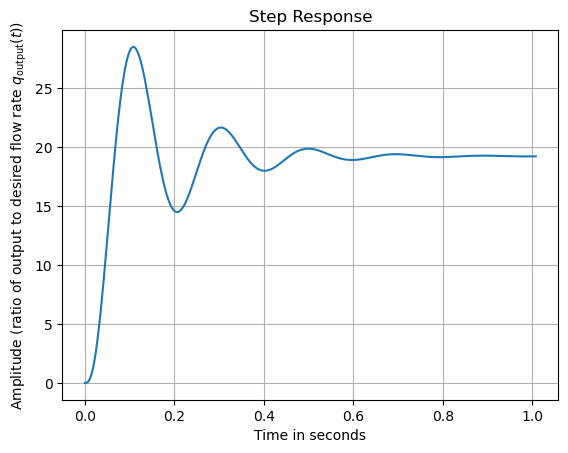

In [29]:
import control
import matplotlib.pyplot as plt
# Calculate the step response
tf = control.TransferFunction(num, den)
t, y = control.step_response(tf)

# Plot the step response
plt.plot(t, y)
plt.xlabel("Time in seconds")
plt.ylabel(r"Amplitude (ratio of output to desired flow rate $q_\text{output}(t)$)") #notice the r before the string for a raw string to allow for LaTeX math notation inside the dollar signs
plt.title(rf"Step Response")
plt.grid(True)
plt.show()

A few remarks: the response has significant oscillation, which is undesirable for machining applications. Also, it takes nearly 1 second to settle in position. This is quite slow for a fast CNC machine tool, and so living with this level of position oscillation (appearing as vibration) would require much slower machining. Let's try a control system to speed up the response and remove the oscillation.

## PD Controller

First, examine the root locus plot of this system. This shows how the roots move when a proportional gain is used for feedback. We plot this below and realize that the X symbols move to cross the right edge of the plot (the vertical axis), indicating that increasing the proportional gain will cause the closed loop controlled system to go unstable. 

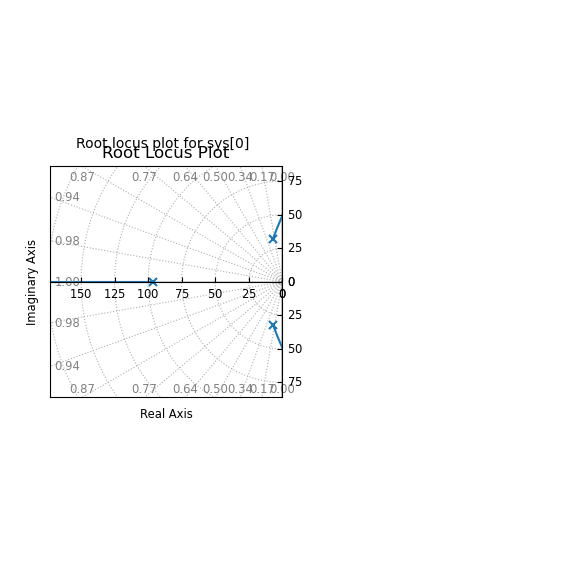

In [30]:
# Generate the root locus plot
plt.figure(figsize=(3, 3))
control.rlocus(tf)
plt.title('Root Locus Plot')
plt.xlabel('Real Axis')
plt.ylabel('Imaginary Axis')
plt.grid(True)
plt.show()

For this reason, we might try a PD controller, which puts a zero in the closed loop transfer function and might help pull these poles away from instability. Let's rebuild our transfer function using a PD controller with pole at 20

In [74]:
#Set the P-gain
from ipywidgets import interact,interactive,widgets
from IPython.display import display

K_p = 0.25
KPSlider = widgets.FloatLogSlider(
    value=K_p,
    min=-4,
    max=3,
    # step=0.001,
    description="K_p:",
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.3f',
)


def update_variable(change):
    global K_p
    K_p = change.new
    # print(f"Variable updated to: {my_variable}")

KPSlider.observe(update_variable, names='value')
display(KPSlider)

FloatLogSlider(value=0.25, description='K_p:', max=3.0, min=-4.0, readout_format='.3f')

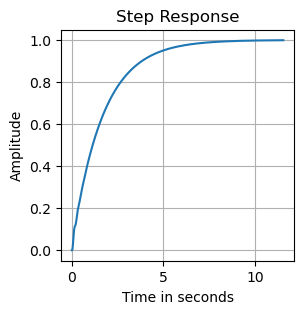

In [78]:
pole = -20
# K_p = .25 #now set by slider above.
K_d = -K_p/pole
PD_controller = K_p+s*K_d

open_loop_t_f_numerator = k/N
open_loop_t_f_denominator = (J_l*s**2 + c_l*s + k)*(J_m*s**2 + c_m*s + k/N**2)-k**2/N**2

G = PD_controller*open_loop_t_f_numerator / open_loop_t_f_denominator
ans = sympy.simplify(G/(1+G))
[num,den]=sympy.fraction(ans)
num = num.as_poly().coeffs()
num = [float(x) for x in num]
den = den.as_poly().coeffs()
den = [float(x) for x in den]

# den = [1, 2]
# Calculate the step response
tf = control.TransferFunction(num, den)
t, y = control.step_response(tf)

# Plot the step response
plt.figure(figsize=(3, 3))
plt.plot(t, y)
plt.xlabel("Time in seconds")
plt.ylabel(r"Amplitude") #notice the r before the string for a raw string to allow for LaTeX math notation inside the dollar signs
plt.title(rf"Step Response")
plt.grid(True)
plt.show()

We observe a few points.
* The closed loop control system using this PD controller with pole at $s=-20$ goes unstable for approximately $K_p>0.4$.
* The step response has at best approximately 1 second settling time.
* The steady state error is zero when the controller is stable
* A very low $K_p$ causes a very sluggish system.

This performance is not acceptable for a machineto


### <center>[◀︎ Module 4](Module4.ipynb)     [🏠 Home](../../welcomePage.ipynb)     [Module 6 ▶︎](Module6.ipynb)</center>